In [ ]:
##Data Description:
#Dataset is County Health Rankings & Roadmaps which was compiled by the University of Wisconsin Population Health Institute in 2023. The dataset has variables 
#relating to clinical care, health behaviors, physical environment, socioeconomic factors, and health outcomes. The data is aggregated by every county in all 50 states.  

##Why this dataset: 
#I previously used this dataset for a project over the summer, but I wasn't satisfied with what I turned in so I want to work on it further. Also, I am
#currently in an epidemiology class right now, so playing around with surveillance data is cool. Furthermore, my professor mentioned that being able to convey data is 
#really important to get support (funding, leggislators, etc), so building out a dashboard would be tying this data science class and public health together. 
#Preventable Hospital Stays is the frequency of hospitalizations due to ambulatory care sensitive conditions, which means hospitalizations that could've been avoided, if care/treatment
#was provided earlier. This really speaks on how access, infrastructure, and quality of treatment affect health conditions. 

##Usage of data:
#The data  is collected annually to survey how health is impacted by environmnt, SES, and access to care. The use for this data is to 
#illuminate what factors are most influential in health outcomes to further improve community public health and creating a 
#more equitable healthcare system. 

##How was it collected/provenance:
#The dataset was first released annually in 2010 exploring 100 different measures as a way for counties understand how healthy their residents are.
#The County Health Rankings Conceptual Model of Health divides the variables into 3 different categories: Health Outcomes, Health Factors, and Policies&Programs.

https://www.countyhealthrankings.org/sites/default/files/media/document/2023%20CHRR%20Technical%20Document.pdf


In [52]:
#load data and packages
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
#load data
df = pd.read_csv("analytic_data2023_0.csv", header = 0)
df = df.drop(df.index[0], axis = 0)


C:\Users\megan\AppData\Local\Temp\ipykernel_31772\2414637972.py:2: DtypeWarning: Columns (0,1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,

In [9]:
#View DF
df


,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature Death raw value,Premature Death numerator,Premature Death denominator,...,% Female raw value,% Female numerator,% Female denominator,% Female CI low,% Female CI high,% Rural raw value,% Rural numerator,% Rural denominator,% Rural CI low,% Rural CI high
1,0,0,0,US,United States,2023,NaN,7281.935564,4125218,917267406,...,0.504706719,167509003,331893745,NaN,NaN,0.193,NaN,NaN,NaN,NaN
2,1,0,1000,AL,Alabama,2023,NaN,10350.07146,88086,13668498,...,0.514254217,2591778,5039877,NaN,NaN,0.409631829,1957932,4779736,NaN,NaN
3,1,1,1001,AL,Autauga County,2023,1,8027.394727,836,156081,...,0.513782892,30362,59095,NaN,NaN,0.420021623,22921,54571,NaN,NaN
4,1,3,1003,AL,Baldwin County,2023,1,8118.358206,3377,614143,...,0.513477145,122872,239294,NaN,NaN,0.422790991,77060,182265,NaN,NaN
5,1,5,1005,AL,Barbour County,2023,1,12876.76032,539,68126,...,0.467032527,11659,24964,NaN,NaN,0.677896347,18613,27457,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,56,37,56037,WY,Sweetwater County,2023,1.0,8419.275418,599,122399,...,0.482001,20058,41614,NaN,NaN,0.109163,4782,43806,NaN,NaN
3191,56,39,56039,WY,Teton County,2023,1.0,3283.066198,111,66036,...,0.477073,11247,23575,NaN,NaN,0.464309,9887,21294,NaN,NaN
3192,56,41,56041,WY,Uinta County,2023,1.0,9358.208153,287,57690,...,0.48975,10106,20635,NaN,NaN,0.430959,9101,21118,NaN,NaN
3193,56,43,56043,WY,Washakie County,2023,1.0,7073.941804,115,21075,...,0.485918,3744,7705,NaN,NaN,0.359545,3068,8533,NaN,NaN


In [53]:
#drop the state, county, 5 digit FIPS code because not necessary in identifying when already have the state and county 
df = df.drop(df.iloc[:, 0:3], axis = 1)
df

#drop columns with less than 80% of data

for column in df:
    #find missing values / length of col
    prop_missing = df[column].isnull().sum()/len(df[column])
    #if there are more than 25% NAs, then drop column
    if prop_missing > 0.20:
        df = df.drop(column, axis = 1)

#check to see if columns have been dropped
df.shape

display(df)
print(df)






,County Ranked (Yes=1/No=0),Premature Death raw value,Premature Death numerator,Premature Death denominator,Premature Death CI low,Premature Death CI high,Premature Death flag (0 = No Flag/1=Unreliable/2=Suppressed),Premature Death flag (AIAN) (. = No Flag/1=Unreliable/2=Suppressed),Premature Death flag (Asian/Pacific Islander) (. = No Flag/1=Unreliable/2=Suppressed),Premature Death (White),Premature Death CI low (White),Premature Death CI high (White),Poor or Fair Health raw value,Poor or Fair Health CI low,Poor or Fair Health CI high,Poor Physical Health Days raw value,Poor Physical Health Days CI low,Poor Physical Health Days CI high,Poor Mental Health Days raw value,Poor Mental Health Days CI low,Poor Mental Health Days CI high,Low Birthweight raw value,Low Birthweight numerator,Low Birthweight denominator,Low Birthweight CI low,Low Birthweight CI high,LBW unreliable indicator (Unreliable = Numerator < 20 or relative standard error > 20%),Low Birthweight (White),Low Birthweight CI low (White),Low Birthweight CI high (White),Adult Smoking raw value,Adult Smoking CI low,Adult Smoking CI high,Adult Obesity raw value,Adult Obesity CI low,Adult Obesity CI high,Food Environment Index raw value,Food Environment Index numerator,Food Environment Index denominator,Physical Inactivity raw value,Physical Inactivity CI low,Physical Inactivity CI high,Access to Exercise Opportunities raw value,Access to Exercise Opportunities numerator,Access to Exercise Opportunities denominator,Excessive Drinking raw value,Excessive Drinking CI low,Excessive Drinking CI high,Alcohol-Impaired Driving Deaths raw value,Alcohol-Impaired Driving Deaths numerator,Alcohol-Impaired Driving Deaths denominator,Alcohol-Impaired Driving Deaths CI low,Alcohol-Impaired Driving Deaths CI high,Sexually Transmitted Infections raw value,Sexually Transmitted Infections numerator,Sexually Transmitted Infections denominator,Teen Births raw value,Teen Births numerator,Teen Births denominator,Teen Births CI low,Teen Births CI high,Teen Births (White),Teen Births CI low (White),Teen Births CI high (White),Uninsured raw value,Uninsured numerator,Uninsured denominator,Uninsured CI low,Uninsured CI high,Primary Care Physicians raw value,Primary Care Physicians numerator,Primary Care Physicians denominator,Ratio of population to primary care physicians.,Dentists raw value,Dentists numerator,Dentists denominator,Ratio of population to dentists.,Mental Health Providers raw value,Mental Health Providers numerator,Mental Health Providers denominator,Ratio of population to mental health providers.,Preventable Hospital Stays raw value,Preventable Hospital Stays (White),Mammography Screening raw value,Mammography Screening (White),Flu Vaccinations raw value,Flu Vaccinations (White),High School Completion raw value,High School Completion numerator,High School Completion denominator,High School Completion CI low,High School Completion CI high,Some College raw value,Some College numerator,Some College denominator,Some College CI low,Some College CI high,Unemployment raw value,Unemployment numerator,Unemployment denominator,Children in Poverty raw value,Children in Poverty numerator,Children in Poverty CI low,Children in Poverty CI high,Children in Poverty (White),Children in Poverty CI low (White),Children in Poverty CI high (White),Income Inequality raw value,Income Inequality numerator,Income Inequality denominator,Income Inequality CI low,Income Inequality CI high,Children in Single-Parent Households raw value,Children in Single-Parent Households numerator,Children in Single-Parent Households denominator,Children in Single-Parent Households CI low,Children in Single-Parent Households CI high,Social Associations raw value,Social Associations numerator,Social Associations denominator,Injury Deaths raw value,Injury Deaths numerator,Injury Deaths denominator,Injury Deaths CI low,Injury Deaths CI high,Injury Deaths (White),Injury Deaths CI low (White),Injury Deaths CI high (White),Air Pollu

     County Ranked (Yes=1/No=0) Premature Death raw value  \
1                           NaN               7281.935564   
2                           NaN               10350.07146   
3                             1               8027.394727   
4                             1               8118.358206   
5                             1               12876.76032   
...                         ...                       ...   
3190                        1.0               8419.275418   
3191                        1.0               3283.066198   
3192                        1.0               9358.208153   
3193                        1.0               7073.941804   
3194                        1.0               5149.435226   

     Premature Death numerator Premature Death denominator  \
1                      4125218                   917267406   
2                        88086                    13668498   
3                          836                      156081   
4                  

In [54]:
#dropping the variables that include numerator, denominator, CI because I just want to look at the raw value for simplicity
#also remove other health outcome variables because only interested in preventable hospital stays (PHS)
dropped_df = df[df.columns.drop(list(df.filter(regex="denominator|numerator|CI low|CI high|Premature Death|Poor Mental Health Days|Drug Overdose Deaths|Release Year|County Ranked|LBW|Low Birthweight|%|(White)|(Hispanic)|(Black)|(Asian/Pacific Islander)|(AIAN)|Social Associations|Driving|Scores|Census|Traffic Volume|Voter|Fatalities|Deaths|Mortality|Suicide|Juvenile")))]

dropped_df


,Poor or Fair Health raw value,Poor Physical Health Days raw value,Adult Smoking raw value,Adult Obesity raw value,Food Environment Index raw value,Physical Inactivity raw value,Access to Exercise Opportunities raw value,Excessive Drinking raw value,Sexually Transmitted Infections raw value,Teen Births raw value,Uninsured raw value,Primary Care Physicians raw value,Ratio of population to primary care physicians.,Dentists raw value,Ratio of population to dentists.,Mental Health Providers raw value,Ratio of population to mental health providers.,Preventable Hospital Stays raw value,Mammography Screening raw value,Flu Vaccinations raw value,High School Completion raw value,Some College raw value,Unemployment raw value,Children in Poverty raw value,Income Inequality raw value,Children in Single-Parent Households raw value,Air Pollution - Particulate Matter raw value,Drinking Water Violations raw value,Severe Housing Problems raw value,Percentage of households with high housing costs,Percentage of households with overcrowding,Percentage of households with lack of kitchen or plumbing facilities,Life Expectancy raw value,Frequent Physical Distress raw value,Frequent Mental Distress raw value,Diabetes Prevalence raw value,HIV Prevalence raw value,Food Insecurity raw value,Limited Access to Healthy Foods raw value,Insufficient Sleep raw value,Uninsured Adults raw value,Uninsured Children raw value,Other Primary Care Providers raw value,Ratio of population to primary care providers other than physicians.,School Segregation raw value,School Funding Adequacy raw value,Gender Pay Gap raw value,Median Household Income raw value,Children Eligible for Free or Reduced Price Lunch raw value,Child Care Cost Burden raw value,Child Care Centers raw value,Homeownership raw value,Severe Housing Cost Burden raw value,Broadband Access raw value,Population raw value
1,0.12,3,0.16,0.32,7,0.22,0.842386305,0.19,481.3,19.30057259,0.104449673,0.000763761,1309.310753,0.000724681,1379.918031,0.002957013,338.1791425,2809,0.37,0.51,0.888740403,0.672532598,0.053529131,0.169,4.891374929,0.251296721,7.4,NaN,0.169672182,0.13748852,0.033505655,0.009954708,78.52889465,0.09,0.14,0.09,379.7,0.118,0.061001965,0.33,0.123766561,0.053954267,0.00123187,811.7738657,0.2454,1062,0.810044461,69717,0.530854768,0.265935707,6.863866828,0.646331101,0.14275749,0.870006959,331893745
2,0.189,3.482416141,0.195,0.393,5.3,0.278,0.609266723,0.161416269,552.2,27.5988893,0.118227157,0.000657925,1519.929586,0.000486917,2053.739609,0.001254197,797.3227337,3599,0.36,0.44,0.874027002,0.615008274,0.034390283,0.227,5.176676331,0.309092192,9.3,0.134328358,0.131567888,0.112969396,0.017080725,0.008279373,74.83594896,0.110773968,0.164842962,0.13,341.6,0.145,0.087605485,0.392430096,0.14910001,0.03626804,0.001086138,920.6936427,0.281741266,-3868.511,0.741897099,53990,0.53338294,0.272221818,5.509231686,0.69394787,0.119442481,0.820457145,5039877
3,0.169,3.432211196,0.183,0.373,6.6,0.264,0.555377944,0.166562602,563.8,22.97694569,0.10559421,0.000445276,2245.8,0.000321516,3110.263158,0.00035536,2814.047619,4372,0.38,0.42,0.895844903,0.596125972,0.028169014,0.161,4.794399967,0.267661764,10,0,0.144426268,0.126358054,0.011217574,0.016358962,76.58564973,0.107,0.162,0.106,242.5,0.145,0.13020998,0.375,0.131588319,0.03843278,0.000473813,2110.535714,0.052838525,-2077.142,0.684510606,66444,0.412506979,0.203509723,5.726341169,0.742450586,0.127533177,0.854639458,59095
4,0.149,3.276176952,0.169,0.326,7.5,0.232,0.657358468,0.18965166,352.1,23.73432001,0.108748808,0.000654202,1528.58,0.000476401,2099.070175,0.00104474,957.176,2864,0.39,0.47,0.910141563,0.661050112,0.029629779,0.164,4.300709801,0.186991704,7.6,1,0.12238972,0.105610561,0.012912393,0.006425306,77.72472918,0.099,0.161,0.097,176.1,0.124,0.079367794,0.351,0.136088353,0.037613515,0.000743855,1344.348315,0.091502084,343.0381,0.740877424,65658,0.463739858,0.211748759,6.231823847,0.771212295,0.109629418,0.878564056,239294
5,0.275,4.605431863,0.259,0.464,5.8,0.357,

In [55]:
#keeping the race data on PHS (Preventable Hospital Stays--> make the first row header 
race = pd.read_csv("analytic_data2023_0.csv", header = 0)
#drop second row containing variable codes 
race = race.drop(race.index[0], axis = 0)

race = race[["Preventable Hospital Stays (Black)", "Preventable Hospital Stays (White)","Preventable Hospital Stays (AIAN)", 
"Preventable Hospital Stays (Hispanic)", "Preventable Hospital Stays (Asian/Pacific Islander)"]]

race



C:\Users\megan\AppData\Local\Temp\ipykernel_31772\1219866161.py:2: DtypeWarning: Columns (0,1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,

,Preventable Hospital Stays (Black),Preventable Hospital Stays (White),Preventable Hospital Stays (AIAN),Preventable Hospital Stays (Hispanic),Preventable Hospital Stays (Asian/Pacific Islander)
1,4630,2635,4334,2725,1603
2,4725,3358,7955,3084,2049
3,7325,3824,NaN,NaN,15789
4,4455,2789,NaN,893,2048
5,4796,2957,NaN,NaN,NaN
...,...,...,...,...,...
3190,NaN,1789.0,NaN,1841.0,NaN
3191,NaN,1687.0,NaN,NaN,NaN
3192,NaN,2597.0,NaN,NaN,NaN
3193,NaN,1893.0,NaN,1967.0,NaN


In [56]:
#append the two data frames together (racial values for preventable hospital stays 
#and all other vars)

combined = pd.concat([dropped_df, race], axis = 1)
combined

,Poor or Fair Health raw value,Poor Physical Health Days raw value,Adult Smoking raw value,Adult Obesity raw value,Food Environment Index raw value,Physical Inactivity raw value,Access to Exercise Opportunities raw value,Excessive Drinking raw value,Sexually Transmitted Infections raw value,Teen Births raw value,Uninsured raw value,Primary Care Physicians raw value,Ratio of population to primary care physicians.,Dentists raw value,Ratio of population to dentists.,Mental Health Providers raw value,Ratio of population to mental health providers.,Preventable Hospital Stays raw value,Mammography Screening raw value,Flu Vaccinations raw value,High School Completion raw value,Some College raw value,Unemployment raw value,Children in Poverty raw value,Income Inequality raw value,Children in Single-Parent Households raw value,Air Pollution - Particulate Matter raw value,Drinking Water Violations raw value,Severe Housing Problems raw value,Percentage of households with high housing costs,Percentage of households with overcrowding,Percentage of households with lack of kitchen or plumbing facilities,Life Expectancy raw value,Frequent Physical Distress raw value,Frequent Mental Distress raw value,Diabetes Prevalence raw value,HIV Prevalence raw value,Food Insecurity raw value,Limited Access to Healthy Foods raw value,Insufficient Sleep raw value,Uninsured Adults raw value,Uninsured Children raw value,Other Primary Care Providers raw value,Ratio of population to primary care providers other than physicians.,School Segregation raw value,School Funding Adequacy raw value,Gender Pay Gap raw value,Median Household Income raw value,Children Eligible for Free or Reduced Price Lunch raw value,Child Care Cost Burden raw value,Child Care Centers raw value,Homeownership raw value,Severe Housing Cost Burden raw value,Broadband Access raw value,Population raw value,Preventable Hospital Stays (Black),Preventable Hospital Stays (White),Preventable Hospital Stays (AIAN),Preventable Hospital Stays (Hispanic),Preventable Hospital Stays (Asian/Pacific Islander)
1,0.12,3,0.16,0.32,7,0.22,0.842386305,0.19,481.3,19.30057259,0.104449673,0.000763761,1309.310753,0.000724681,1379.918031,0.002957013,338.1791425,2809,0.37,0.51,0.888740403,0.672532598,0.053529131,0.169,4.891374929,0.251296721,7.4,NaN,0.169672182,0.13748852,0.033505655,0.009954708,78.52889465,0.09,0.14,0.09,379.7,0.118,0.061001965,0.33,0.123766561,0.053954267,0.00123187,811.7738657,0.2454,1062,0.810044461,69717,0.530854768,0.265935707,6.863866828,0.646331101,0.14275749,0.870006959,331893745,4630,2635,4334,2725,1603
2,0.189,3.482416141,0.195,0.393,5.3,0.278,0.609266723,0.161416269,552.2,27.5988893,0.118227157,0.000657925,1519.929586,0.000486917,2053.739609,0.001254197,797.3227337,3599,0.36,0.44,0.874027002,0.615008274,0.034390283,0.227,5.176676331,0.309092192,9.3,0.134328358,0.131567888,0.112969396,0.017080725,0.008279373,74.83594896,0.110773968,0.164842962,0.13,341.6,0.145,0.087605485,0.392430096,0.14910001,0.03626804,0.001086138,920.6936427,0.281741266,-3868.511,0.741897099,53990,0.53338294,0.272221818,5.509231686,0.69394787,0.119442481,0.820457145,5039877,4725,3358,7955,3084,2049
3,0.169,3.432211196,0.183,0.373,6.6,0.264,0.555377944,0.166562602,563.8,22.97694569,0.10559421,0.000445276,2245.8,0.000321516,3110.263158,0.00035536,2814.047619,4372,0.38,0.42,0.895844903,0.596125972,0.028169014,0.161,4.794399967,0.267661764,10,0,0.144426268,0.126358054,0.011217574,0.016358962,76.58564973,0.107,0.162,0.106,242.5,0.145,0.13020998,0.375,0.131588319,0.03843278,0.000473813,2110.535714,0.052838525,-2077.142,0.684510606,66444,0.412506979,0.203509723,5.726341169,0.742450586,0.127533177,0.854639458,59095,7325,3824,NaN,NaN,15789
4,0.149,3.276176952,0.169,0.326,7.5,0.232,0.657358468,0.18965166,352.1,23.73432001,0.108748808,0.000654202,1528.58,0.000476401,2099.070175,0.00104474,957.176,2864,0.39,0.47,0.910141563,0.661050112,0.029629779,0.164,4.300709801,0.186991704,7.6,1,0.12238972,0.105610561,0.012912393,0.006425306,

In [57]:
#melt all the Preventable Hospital Stays Race data
#turn the race variables and melt them since each county has a race for each column, want race to all be under a singular column

#id_vars keeps the columns specified the same, var_name will name the column, value_name takes the value
#need to specify all columns in combined

id_vars = dropped_df.columns
melted = pd.melt(combined, id_vars=id_vars, var_name='Race', value_name='Preventable Hospital Stay Value')
melted

,Poor or Fair Health raw value,Poor Physical Health Days raw value,Adult Smoking raw value,Adult Obesity raw value,Food Environment Index raw value,Physical Inactivity raw value,Access to Exercise Opportunities raw value,Excessive Drinking raw value,Sexually Transmitted Infections raw value,Teen Births raw value,Uninsured raw value,Primary Care Physicians raw value,Ratio of population to primary care physicians.,Dentists raw value,Ratio of population to dentists.,Mental Health Providers raw value,Ratio of population to mental health providers.,Preventable Hospital Stays raw value,Mammography Screening raw value,Flu Vaccinations raw value,High School Completion raw value,Some College raw value,Unemployment raw value,Children in Poverty raw value,Income Inequality raw value,Children in Single-Parent Households raw value,Air Pollution - Particulate Matter raw value,Drinking Water Violations raw value,Severe Housing Problems raw value,Percentage of households with high housing costs,Percentage of households with overcrowding,Percentage of households with lack of kitchen or plumbing facilities,Life Expectancy raw value,Frequent Physical Distress raw value,Frequent Mental Distress raw value,Diabetes Prevalence raw value,HIV Prevalence raw value,Food Insecurity raw value,Limited Access to Healthy Foods raw value,Insufficient Sleep raw value,Uninsured Adults raw value,Uninsured Children raw value,Other Primary Care Providers raw value,Ratio of population to primary care providers other than physicians.,School Segregation raw value,School Funding Adequacy raw value,Gender Pay Gap raw value,Median Household Income raw value,Children Eligible for Free or Reduced Price Lunch raw value,Child Care Cost Burden raw value,Child Care Centers raw value,Homeownership raw value,Severe Housing Cost Burden raw value,Broadband Access raw value,Population raw value,Race,Preventable Hospital Stay Value
0,0.12,3,0.16,0.32,7,0.22,0.842386305,0.19,481.3,19.30057259,0.104449673,0.000763761,1309.310753,0.000724681,1379.918031,0.002957013,338.1791425,2809,0.37,0.51,0.888740403,0.672532598,0.053529131,0.169,4.891374929,0.251296721,7.4,NaN,0.169672182,0.13748852,0.033505655,0.009954708,78.52889465,0.09,0.14,0.09,379.7,0.118,0.061001965,0.33,0.123766561,0.053954267,0.00123187,811.7738657,0.2454,1062,0.810044461,69717,0.530854768,0.265935707,6.863866828,0.646331101,0.14275749,0.870006959,331893745,Preventable Hospital Stays (Black),4630
1,0.189,3.482416141,0.195,0.393,5.3,0.278,0.609266723,0.161416269,552.2,27.5988893,0.118227157,0.000657925,1519.929586,0.000486917,2053.739609,0.001254197,797.3227337,3599,0.36,0.44,0.874027002,0.615008274,0.034390283,0.227,5.176676331,0.309092192,9.3,0.134328358,0.131567888,0.112969396,0.017080725,0.008279373,74.83594896,0.110773968,0.164842962,0.13,341.6,0.145,0.087605485,0.392430096,0.14910001,0.03626804,0.001086138,920.6936427,0.281741266,-3868.511,0.741897099,53990,0.53338294,0.272221818,5.509231686,0.69394787,0.119442481,0.820457145,5039877,Preventable Hospital Stays (Black),4725
2,0.169,3.432211196,0.183,0.373,6.6,0.264,0.555377944,0.166562602,563.8,22.97694569,0.10559421,0.000445276,2245.8,0.000321516,3110.263158,0.00035536,2814.047619,4372,0.38,0.42,0.895844903,0.596125972,0.028169014,0.161,4.794399967,0.267661764,10,0,0.144426268,0.126358054,0.011217574,0.016358962,76.58564973,0.107,0.162,0.106,242.5,0.145,0.13020998,0.375,0.131588319,0.03843278,0.000473813,2110.535714,0.052838525,-2077.142,0.684510606,66444,0.412506979,0.203509723,5.726341169,0.742450586,0.127533177,0.854639458,59095,Preventable Hospital Stays (Black),7325
3,0.149,3.276176952,0.169,0.326,7.5,0.232,0.657358468,0.18965166,352.1,23.73432001,0.108748808,0.000654202,1528.58,0.000476401,2099.070175,0.00104474,957.176,2864,0.39,0.47,0.910141563,0.661050112,0.029629779,0.164,4.300709801,0.186991704,7.6,1,0.12238972,0.105610561,0.012912393,0.006425306,77.72472918,0.099,0.161,0.097,176.1,0.124,0.079367794,0.351,0.136088353,0.037613515,0.000743855,1344.348315,0.0

In [64]:
#exploratory data analysis 
print(melted.shape)
#observations:15,970 (for each race in every county in all 50 statese)

#list all columns
print(melted.columns)


#number of missing per column
print("# of missing vals:" , melted.isnull().sum().to_string())

#data type of each column
print(melted.dtypes)



(15970, 57)
Index(['Poor or Fair Health raw value', 'Poor Physical Health Days raw value',
       'Adult Smoking raw value', 'Adult Obesity raw value',
       'Food Environment Index raw value', 'Physical Inactivity raw value',
       'Access to Exercise Opportunities raw value',
       'Excessive Drinking raw value',
       'Sexually Transmitted Infections raw value', 'Teen Births raw value',
       'Uninsured raw value', 'Primary Care Physicians raw value',
       'Ratio of population to primary care physicians.', 'Dentists raw value',
       'Ratio of population to dentists.', 'Mental Health Providers raw value',
       'Ratio of population to mental health providers.',
       'Preventable Hospital Stays raw value',
       'Mammography Screening raw value', 'Flu Vaccinations raw value',
       'High School Completion raw value', 'Some College raw value',
       'Unemployment raw value', 'Children in Poverty raw value',
       'Income Inequality raw value',
       'Children in Single

In [69]:
#convert all but race column to numeric
#melted.loc[:,melted.columns !="Race"] = melted.loc[:,melted.columns!="Race"].apply(pd.to_numeric, errors = "coerce")

#print(melted.info())

cols_convert = [col for col in melted.columns if col != "Race"]

melted[cols_convert] = melted[cols_convert].apply(pd.to_numeric, errors= "coerce")
print(melted.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15970 entries, 0 to 15969
Data columns (total 57 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Poor or Fair Health raw value                                         15960 non-null  float64
 1   Poor Physical Health Days raw value                                   15960 non-null  float64
 2   Adult Smoking raw value                                               15960 non-null  float64
 3   Adult Obesity raw value                                               15960 non-null  float64
 4   Food Environment Index raw value                                      15805 non-null  float64
 5   Physical Inactivity raw value                                         15960 non-null  float64
 6   Access to Exercise Opportunities raw value                            15660 non-null  float64


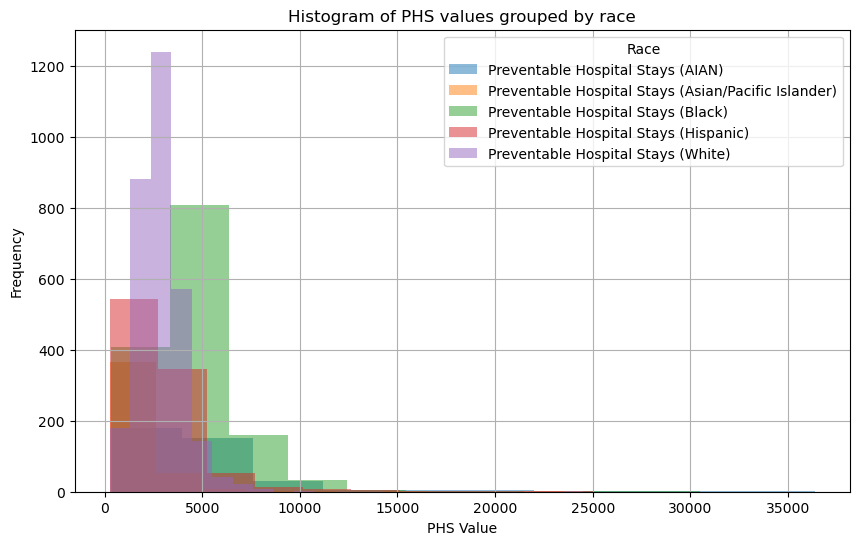

In [68]:
#plotting histogram 
plt.figure(figsize=(10, 6))
for race, group_data in melted.groupby('Race'):
    plt.hist(group_data['Preventable Hospital Stay Value'], bins=10, alpha=0.5, label=race)

plt.title('Histogram of PHS values grouped by race')
plt.xlabel('PHS Value')
plt.ylabel('Frequency')
plt.legend(title='Race')
plt.grid(True)
plt.show()

#decided to only show the outcome variable (Preventable Hospital Stays - PHS) because I plan on 
#doing some modeling and have not decided what variables to include in the model. The PHS data is
#right skewed. 

In [ ]:
Data Dictionary
#   Column                                                                Non-Null Count  Dtype       Description
---  ------                                                                --------------  -----  
 0   Poor or Fair Health raw value                                         15960 non-null  float64  Percentage of adults reporting fair or poor health (age-adjusted)

 1   Poor Physical Health Days raw value                                   15960 non-null  float64  Average number of physically unhealthy days reported in past 30 days (age-adjusted)

 2   Adult Smoking raw value                                               15960 non-null  float64  Average number of physically unhealthy days reported in past 30 days (age-adjusted).

 3   Adult Obesity raw value                                               15960 non-null  float64  Index of factors that contribute to a healthy food environment, from 0 (worst) to 10 (best).

 4   Food Environment Index raw value                                      15805 non-null  float64  Index of factors that contribute to a healthy food environment, from 0 (worst) to 10 (best).

 5   Physical Inactivity raw value                                         15960 non-null  float64  Percentage of adults age 18 and over reporting no leisure-time physical activity (age-adjusted).

 6   Access to Exercise Opportunities raw value                            15660 non-null  float64  Percentage of population with adequate access to locations for physical activity

 7   Excessive Drinking raw value                                          15960 non-null  float64  Percentage of adults reporting binge or heavy drinking (age-adjusted).

 8   Sexually Transmitted Infections raw value                             15355 non-null  float64  Number of newly diagnosed chlamydia cases per 100,000 population.

 9   Teen Births raw value                                                 15025 non-null  float64  Number of births per 1,000 female population ages 15-19.

 10  Uninsured raw value                                                   15965 non-null  float64  Percentage of population under age 65 without health insurance.

 11  Primary Care Physicians raw value                                     15235 non-null  float64  Number of primary care physicians per 100,000 population

 12  Ratio of population to primary care physicians.                       15235 non-null  float64  Ratio of population to primary care physicians.

 13  Dentists raw value                                                    15540 non-null  float64  Number of dentists per 100,000 population

 14  Ratio of population to dentists.                                      15540 non-null  float64  Ratio of population to dentists.

 15  Mental Health Providers raw value                                     14965 non-null  float64  Number of mental health care providers per 100,000 population

 16  Ratio of population to mental health providers.                       14965 non-null  float64  Ratio of population to mental health providers.
 17  Preventable Hospital Stays raw value                                  15615 non-null  float64  Rate of hospital stays for ambulatory-care sensitive conditions per 100,000 Medicare enrollees.

 18  Mammography Screening raw value                                       15865 non-null  float64  Percentage of female Medicare enrollees ages 65-74 that received an annual mammography screening.

 19  Flu Vaccinations raw value                                            15880 non-null  float64  Percentage of fee-for-service (FFS) Medicare enrollees that had an annual flu vaccination.

 20  High School Completion raw value                                      15970 non-null  float64  Percentage of adults ages 25 and over with a high school diploma or equivalent.

 21  Some College raw value                                                15970 non-null  float64  Percentage of adults ages 25-44 with some post-secondary education.

 22  Unemployment raw value                                                15965 non-null  float64  Percentage of population ages 16 and older unemployed but seeking work.

 23  Children in Poverty raw value                                         15965 non-null  float64  Percentage of people under age 18 in poverty.

 24  Income Inequality raw value                                           15935 non-null  float64  Ratio of household income at the 80th percentile to income at the 20th percentile.

 25  Children in Single-Parent Households raw value                        15965 non-null  float64  Percentage of children that live in a household headed by a single parent.

 26  Air Pollution - Particulate Matter raw value                          15835 non-null  float64  Average daily density of fine particulate matter in micrograms per cubic meter (PM2.5).

 27  Drinking Water Violations raw value                                   15745 non-null  float64  Indicator of the presence of health-related drinking water violations. 0=No, 1=Yes

 28  Severe Housing Problems raw value                                     15970 non-null  float64  Percentage of households with at least 1 of 4 housing problems: overcrowding, high housing costs, lack of kitchen facilities, or lack of plumbing facilities.

 29  Percentage of households with high housing costs                      15970 non-null  float64  Percentage of households with severe cost burden > monthly housing costs (including utilities) exceed 50% of monthly income

 30  Percentage of households with overcrowding                            15970 non-null  float64  Percentage of households with overcrowding > more than 1 person per room

 31  Percentage of households with lack of kitchen or plumbing facilities  15970 non-null  float64  Percentage of households lacking complete plumbing or kitchen facilities

 32  Life Expectancy raw value                                             15620 non-null  float64  Average number of years a person can expect to live.

 33  Frequent Physical Distress raw value                                  15960 non-null  float64  Percentage of adults reporting 14 or more days of poor physical health per month (age-adjusted).

 34  Frequent Mental Distress raw value                                    15960 non-null  float64  Percentage of adults reporting 14 or more days of poor mental health per month (age-adjusted).
 
 35  Diabetes Prevalence raw value                                         15960 non-null  float64  Percentage of adults aged 20 and above with diagnosed diabetes (age-adjusted).

 36  HIV Prevalence raw value                                              13675 non-null  float64  Number of people aged 13 years and older living with a diagnosis of human immunodeficiency virus (HIV)infection per 100,000 population.

 37  Food Insecurity raw value                                             15970 non-null  float64  Percentage of population who lack adequate access to food.

 38  Limited Access to Healthy Foods raw value                             15805 non-null  float64  Percentage of population who are low-income and do not live close to a grocery store.

 39  Insufficient Sleep raw value                                          15960 non-null  float64  Percentage of adults who report fewer than 7 hours of sleep on average (age-adjusted).

 40  Uninsured Adults raw value                                            15965 non-null  float64  Percentage of adults under age 65 without health insurance.

 41  Uninsured Children raw value                                          15965 non-null  float64  Percentage of children under age 19 without health insurance.

 42  Other Primary Care Providers raw value                                15915 non-null  float64  Number of other primary care providers per 100,000 population

 43  Ratio of population to primary care providers other than physicians.  15915 non-null  float64  Ratio of population to primary care providers other than physicians.

 44  School Segregation raw value                                          14810 non-null  float64  How segregated different racial groups are compared across schools.

 45  School Funding Adequacy raw value                                     15665 non-null  float64  The average gap in dollars between actual and required spending per pupil among public school districts required spending is an estimate of dollars needed to achieve U.S. average test scores in each district.

 46  Gender Pay Gap raw value                                              15935 non-null  float64  Ratio of women's median earnings to men's median earnings for all full-time

 47  Median Household Income raw value                                     15960 non-null  float64  The income where half of households in a county earn more and half of households earn less.

 48  Children Eligible for Free or Reduced Price Lunch raw value           13030 non-null  float64  Percentage of children enrolled in public schools that are eligible for free or reduced price lunch.

 49  Child Care Cost Burden raw value                                      15960 non-null  float64  Child care costs for a household with two children as a percent of median household income.

 50  Child Care Centers raw value                                          15220 non-null  float64  Number of child care centers per 1,000 population under 5 years old.

 51  Homeownership raw value                                               15970 non-null  float64  Percentage of owner-occupied housing units.

 52  Severe Housing Cost Burden raw value                                  15945 non-null  float64  Percentage of households that spend 50% or more of their household income on housing.

 53  Broadband Access raw value                                            15970 non-null  float64  Percentage of households with broadband internet connection.

 54  Population raw value                                                  15970 non-null  int64  Population 
 55  Race                                                                  15970 non-null  object 5 Racial Groups 
 56  Preventable Hospital Stay Value                                       6309 non-null   float64  Rate of hospital stays for ambulatory-care sensitive conditions per 100,000 Medicare enrollees.


In [ ]:
#brainstorm UI components that could be included in dashboard
#tab: could be useful to section off what I want to present on each "page" of the dashboard
#checkbox: could be interesting to let the audience choose factors to see what PHS rate will be predicted
#button
#dropdown

#list 3-6 data viz 
    #looking at the PHS rate by region --> map graph of areas with highest rates of PHS 
    #looking at PHS by race
    #Pairs Plot of race and factors that are most influential to PHS 
    #bubble graphs


In [70]:
melted.to_csv('data.csv')